<a href="https://colab.research.google.com/github/dotlincu/social-media-analysis/blob/main/social_media_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import plotly.express as px

from google.colab import drive
from wordcloud import WordCloud
from PIL import Image
from plotly.offline import iplot

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# preparação dados - campeões das edições

In [ ]:
# files_path = '/content/drive/My Drive/world-cup-archives'

df_world_cup = pd.read_csv('/content/drive/My Drive/world-cup-archives/WorldCups.csv', sep=',')
df_world_cup.columns = ['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance']
df_world_cup = df_world_cup.dropna()

df_world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [ ]:
df_world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [ ]:
country = df_world_cup['Country'].value_counts()
country

,count
Country,
Italy,2
France,2
Brazil,2
Mexico,2
Germany,2
Uruguay,1
Switzerland,1
Sweden,1
Chile,1


In [ ]:
winner = df_world_cup['Winner'].value_counts()
winner

,count
Winner,
Brazil,5
Italy,4
Germany FR,3
Uruguay,2
Argentina,2
England,1
France,1
Spain,1
Germany,1


In [ ]:
runners_up = df_world_cup['Runners-Up'].value_counts()
runners_up

,count
Runners-Up,
Argentina,3
Germany FR,3
Netherlands,3
Czechoslovakia,2
Hungary,2
Brazil,2
Italy,2
Sweden,1
Germany,1


In [ ]:
third = df_world_cup['Third'].value_counts()
third

,count
Third,
Germany,3
Brazil,2
Sweden,2
France,2
Poland,2
USA,1
Austria,1
Chile,1
Portugal,1


In [ ]:
fourth = df_world_cup['Fourth'].value_counts()
fourth

,count
Fourth,
Uruguay,3
Yugoslavia,2
Brazil,2
Austria,1
Sweden,1
Spain,1
Germany FR,1
Soviet Union,1
Italy,1


In [ ]:
df_world_cup['GoalsScored'].describe()

,GoalsScored
count,20.000000
mean,118.950000
std,32.972836
min,70.000000
25%,89.000000
50%,120.500000
75%,145.250000
max,171.000000


In [ ]:
df_world_cup['MatchesPlayed'].describe()

,MatchesPlayed
count,20.000000
mean,41.800000
std,17.218717
min,17.000000
25%,30.500000
50%,38.000000
75%,55.000000
max,64.000000


## maiores titulos

In [ ]:
teams = pd.concat([winner, runners_up, third, fourth], axis=1)
teams.columns = ['Winner', 'Runners-Up', 'Third', 'Fourth']
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third,Fourth
Brazil,5,2,2,2
Italy,4,2,1,1
Germany FR,3,3,1,1
Uruguay,2,0,0,3
Argentina,2,3,0,0
England,1,0,0,1
France,1,1,2,1
Spain,1,0,0,1
Germany,1,1,3,0
Netherlands,0,3,1,1


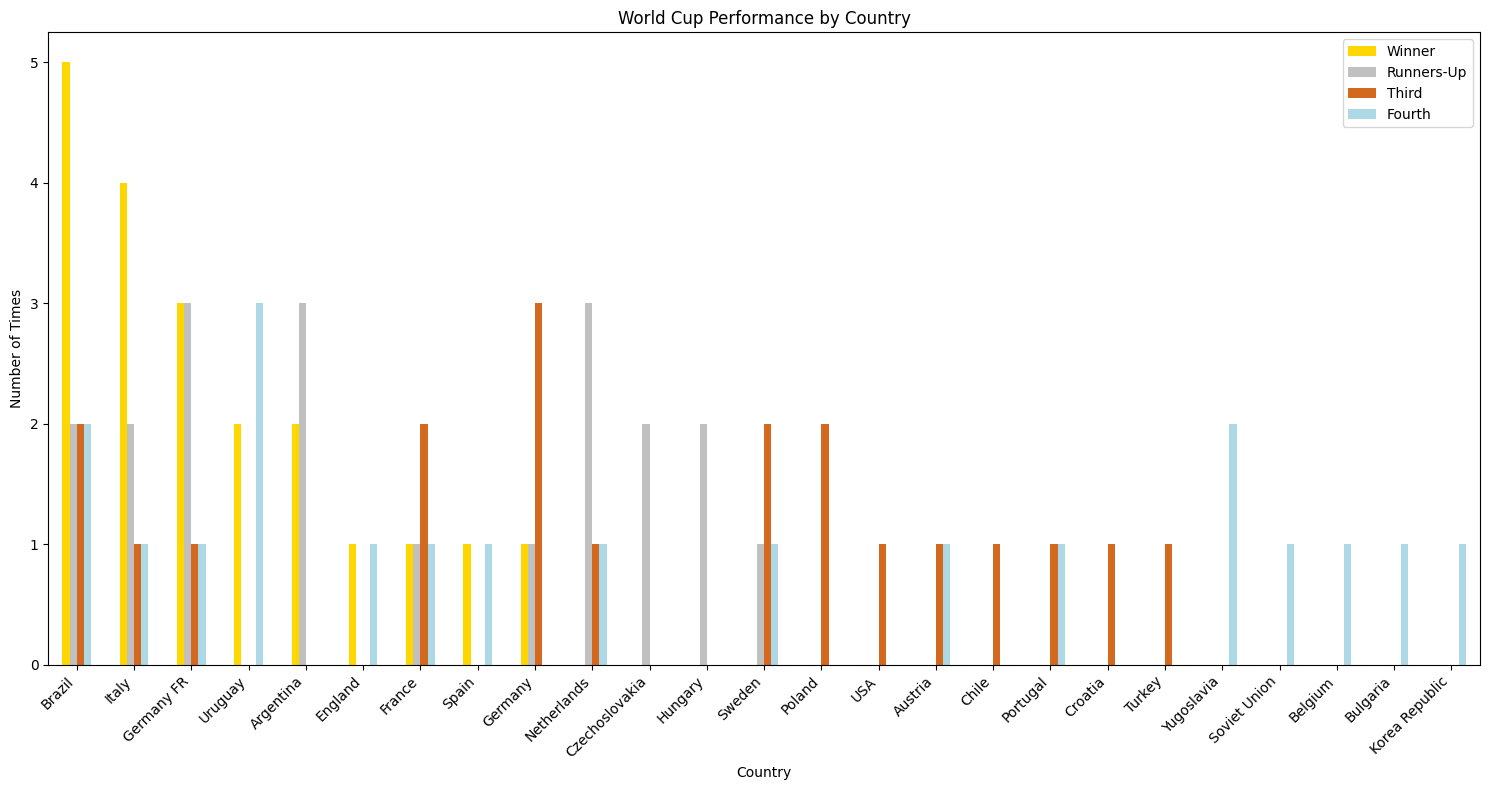

In [ ]:
colors = ['gold', 'silver', 'chocolate', 'lightblue']
teams.plot(kind='bar', figsize=(15, 8), color=colors)
plt.title('World Cup Performance by Country')
plt.xlabel('Country')
plt.ylabel('Number of Times')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## estatisticas edicoes -

In [ ]:
df_world_cup['Attendance'].describe()

,Attendance
count,20
unique,20
top,590.549
freq,1


In [ ]:
df_world_cup['Attendance'] = df_world_cup['Attendance'].str.replace('.', '', regex=False).astype(int)
df_world_cup['Attendance'].describe()

,Attendance
count,2.000000e+01
mean,1.872882e+06
std,1.071842e+06
min,3.630000e+05
25%,8.748315e+05
50%,1.734864e+06
75%,2.725173e+06
max,3.587538e+06


In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
df_world_cup['Attendance'].describe()

,Attendance
count,20
mean,"1,872,882"
std,"1,071,842"
min,"363,000"
25%,"874,832"
50%,"1,734,864"
75%,"2,725,173"
max,"3,587,538"


In [ ]:
df_world_cup['GoalsScored'].describe()

,GoalsScored
count,20
mean,119
std,33
min,70
25%,89
50%,120
75%,145
max,171


### publico por edicao

Text(0.5, 1.0, 'Attendance Per Year')

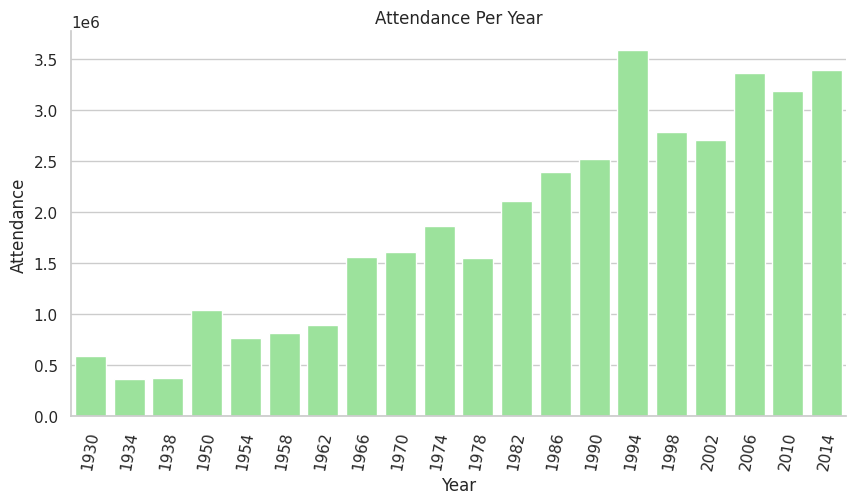

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = df_world_cup, color='lightgreen')
plt.xticks(rotation=80)
g.set_title('Attendance Per Year')

### times qualificados por edicao

Text(0.5, 1.0, 'Qualified Teams Per Year')

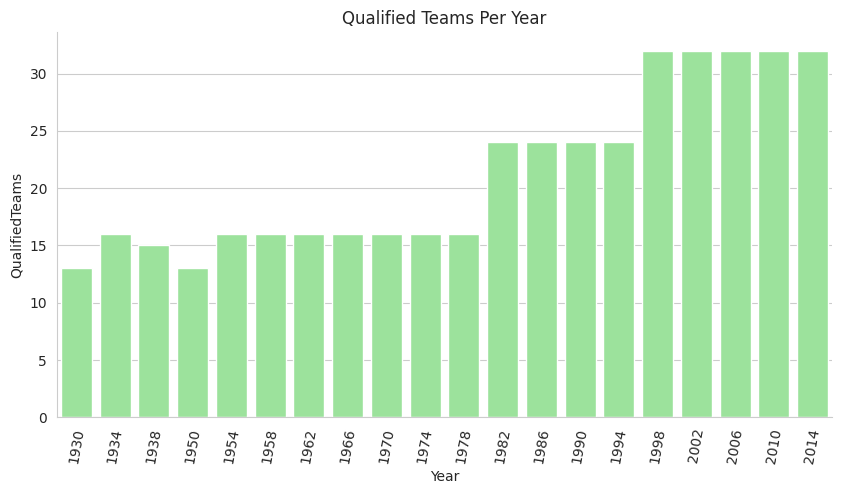

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = df_world_cup, color='lightgreen')
plt.xticks(rotation=80)
g.set_title('Qualified Teams Per Year')

### gols marcados por edicao

Text(0.5, 1.0, 'Goals Scored by Teams Per Year')

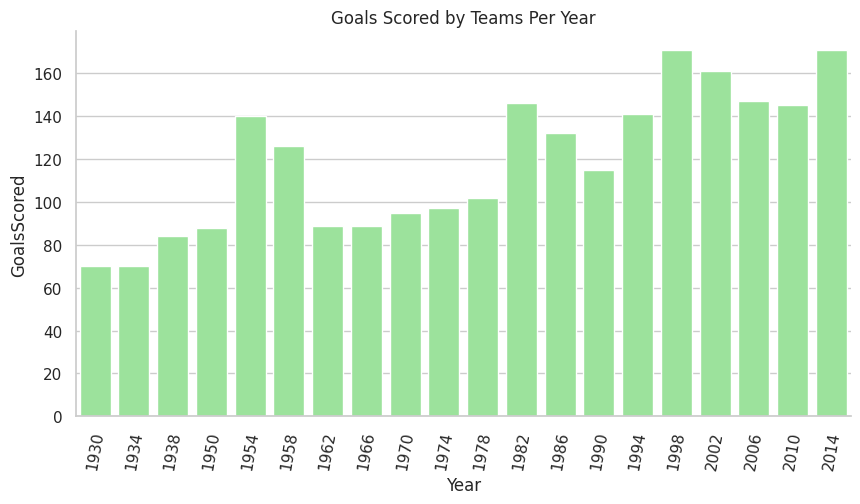

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = df_world_cup, color='lightgreen')
plt.xticks(rotation=80)
g.set_title('Goals Scored by Teams Per Year')

### partidas jogadas por edicao

Text(0.5, 1.0, 'Matches Played Scored by Teams Per Year')

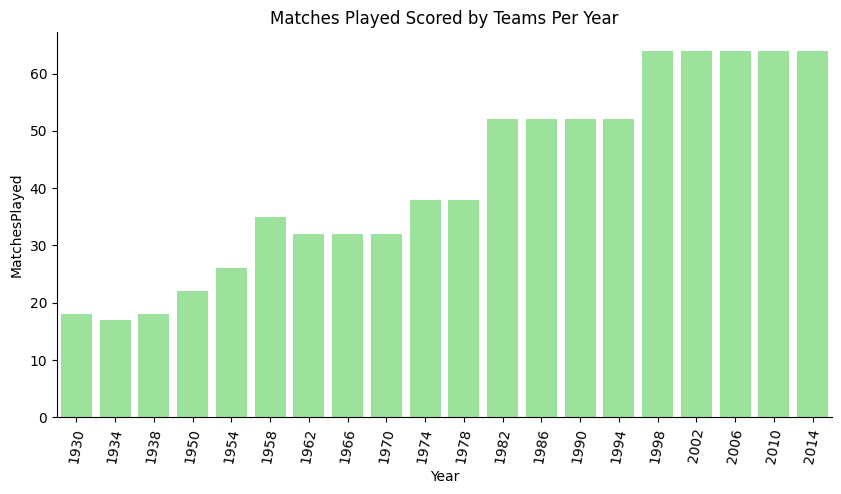

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = df_world_cup, color='lightgreen')
plt.xticks(rotation=80)
g.set_title('Matches Played Scored by Teams Per Year')

## preparacao gephi

## junção germany

In [ ]:
df_world_cup['Country'] = df_world_cup['Country'].replace('Germany FR', 'Germany')
df_world_cup['Winner'] = df_world_cup['Winner'].replace('Germany FR', 'Germany')
df_world_cup['Runners-Up'] = df_world_cup['Runners-Up'].replace('Germany FR', 'Germany')
df_world_cup['Third'] = df_world_cup['Third'].replace('Germany FR', 'Germany')
df_world_cup['Fourth'] = df_world_cup['Fourth'].replace('Germany FR', 'Germany')
winner = df_world_cup['Winner'].value_counts()
winner

In [ ]:
runners_up = df_world_cup['Runners-Up'].value_counts()
runners_up

In [ ]:
third = df_world_cup['Third'].value_counts()
third

In [ ]:
fourth = df_world_cup['Fourth'].value_counts()
fourth

# preparação dados - partidas

In [ ]:
df_matches = pd.read_csv('/content/drive/My Drive/world-cup-archives/WorldCupMatches.csv')
df_matches.columns = ['Year','Datetime','Stage','Stadium','City','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Win conditions','Attendance','Half-time Home Goals','Half-time Away Goals','Referee','Assistant 1','Assistant 2','RoundID','MatchID','Home Team Initials','Away Team Initials']
df_matches = df_matches.dropna()

df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  850 non-null    float64
 1   Datetime              850 non-null    object 
 2   Stage                 850 non-null    object 
 3   Stadium               850 non-null    object 
 4   City                  850 non-null    object 
 5   Home Team Name        850 non-null    object 
 6   Home Team Goals       850 non-null    float64
 7   Away Team Goals       850 non-null    float64
 8   Away Team Name        850 non-null    object 
 9   Win conditions        850 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  850 non-null    float64
 12  Half-time Away Goals  850 non-null    float64
 13  Referee               850 non-null    object 
 14  Assistant 1           850 non-null    object 
 15  Assistant 2           850 no

In [ ]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,"1,930",13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,"4,444",3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,"1,096",FRA,MEX
1,"1,930",13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,"18,346",2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,"1,090",USA,BEL
2,"1,930",14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,"24,059",2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,"1,093",YUG,BRA
3,"1,930",14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,"2,549",1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,"1,098",ROU,PER
4,"1,930",15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,"23,409",0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,"1,085",ARG,FRA


In [ ]:
df_matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [ ]:
df_matches['Stage'].value_counts()

,count
Stage,
Round of 16,70
Quarter-finals,66
Group 1,62
Group A,60
Group B,60
Group 2,59
Group 3,56
Group 4,55
Group C,48


In [ ]:
df_matches = df_matches.replace('Match for third place', 'Third place')
df_matches = df_matches.replace('Play-off for third place', 'Third place')
df_matches = df_matches.replace('Preliminary round', 'Round of 16')
df_matches = df_matches.replace('First round', 'Round of 16')
df_matches = df_matches.replace('Group 1', 'Groups')
df_matches = df_matches.replace('Group 2', 'Groups')
df_matches = df_matches.replace('Group 3', 'Groups')
df_matches = df_matches.replace('Group 4', 'Groups')
df_matches = df_matches.replace('Group 5', 'Groups')
df_matches = df_matches.replace('Group 6', 'Groups')
df_matches = df_matches.replace('Group A', 'Groups')
df_matches = df_matches.replace('Group B', 'Groups')
df_matches = df_matches.replace('Group C', 'Groups')
df_matches = df_matches.replace('Group D', 'Groups')
df_matches = df_matches.replace('Group E', 'Groups')
df_matches = df_matches.replace('Group F', 'Groups')
df_matches = df_matches.replace('Group G', 'Groups')
df_matches = df_matches.replace('Group H', 'Groups')

df_matches['Stage'].value_counts()

,count
Stage,
Groups,622
Round of 16,87
Quarter-finals,66
Semi-finals,36
Final,20
Third place,19


In [ ]:
df_matches[df_matches['Year'] == 1934].head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
18,1934.0,27 May 1934 - 16:30,Round of 16,Stadio Benito Mussolini,Turin,Austria,3.0,2.0,France,Austria win after extra time,16000.0,0.0,0.0,VAN MOORSEL Johannes (NED),CAIRONI Camillo (ITA),BAERT Louis (BEL),204.0,1104.0,AUT,FRA
19,1934.0,27 May 1934 - 16:30,Round of 16,Giorgio Ascarelli,Naples,Hungary,4.0,2.0,Egypt,,9000.0,2.0,2.0,BARLASSINA Rinaldo (ITA),DATTILO Generoso (ITA),SASSI Otello (ITA),204.0,1119.0,HUN,EGY
20,1934.0,27 May 1934 - 16:30,Round of 16,San Siro,Milan,Switzerland,3.0,2.0,Netherlands,,33000.0,2.0,1.0,EKLIND Ivan (SWE),BERANEK Alois (AUT),BONIVENTO Ferruccio (ITA),204.0,1133.0,SUI,NED
21,1934.0,27 May 1934 - 16:30,Round of 16,Littorale,Bologna,Sweden,3.0,2.0,Argentina,,14000.0,1.0,1.0,BRAUN Eugen (AUT),CARRARO Albino (ITA),TURBIANI Giuseppe (ITA),204.0,1102.0,SWE,ARG
22,1934.0,27 May 1934 - 16:30,Round of 16,Giovanni Berta,Florence,Germany,5.0,2.0,Belgium,,8000.0,1.0,2.0,MATTEA Francesco (ITA),MELANDRI Ermenegildo (ITA),BAERT Jacques (FRA),204.0,1108.0,GER,BEL


In [ ]:
df_matches['Home Team Name'].value_counts()

,count
Home Team Name,
Brazil,82
Italy,57
Argentina,54
Germany FR,43
England,35
...,...
Wales,1
Norway,1
"rn"">United Arab Emirates",1


In [ ]:
names = df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

,count
Home Team Name,
"rn"">Republic of Ireland",5
"rn"">United Arab Emirates",1
"rn"">Trinidad and Tobago",1
"rn"">Serbia and Montenegro",1
"rn"">Bosnia and Herzegovina",1


In [ ]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [ ]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [ ]:
for index, wr in enumerate(wrong):
  df_matches = df_matches.replace(wrong[index], correct[index])

In [ ]:
names = df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

,count
Home Team Name,


In [ ]:
names = df_matches[df_matches['Stadium'].str.contains('�')]['Stadium'].value_counts()
names

,count
Stadium,
Nou Camp - Estadio Le�n,11
Stade V�lodrome,9
Maracan� - Est�dio Jornalista M�rio Filho,8
Estadio Ol�mpico Chateau Carreras,8
Estadio Jos� Mar�a Minella,6
Estadio Ol�mpico Universitario,4
Estadio Municipal de Bala�dos,3


In [ ]:
wrong = list(names.index)
wrong

['Nou Camp - Estadio Le�n',
 'Stade V�lodrome',
 'Maracan� - Est�dio Jornalista M�rio Filho',
 'Estadio Ol�mpico Chateau Carreras',
 'Estadio Jos� Mar�a Minella',
 'Estadio Ol�mpico Universitario',
 'Estadio Municipal de Bala�dos']

In [ ]:
correct = ['Nou Camp - Estadio Leon',
 'Stade Velodrome',
 'Maracana - Estadio Jornalista Mario Filho',
 'Estadio Olimpico Chateau Carreras',
 'Estadio Jose Maria Minella',
 'Estadio Olimpico Universitario',
 'Estadio Municipal de Balaidos']
correct

['Nou Camp - Estadio Leon',
 'Stade Velodrome',
 'Maracana - Estadio Jornalista Mario Filho',
 'Estadio Olimpico Chateau Carreras',
 'Estadio Jose Maria Minella',
 'Estadio Olimpico Universitario',
 'Estadio Municipal de Balaidos']

In [ ]:
for index, wr in enumerate(wrong):
  df_matches = df_matches.replace(wrong[index], correct[index])

In [ ]:
names = df_matches[df_matches['Stadium'].str.contains('�')]['Stadium'].value_counts()
names

,count
Stadium,


## frequencia de publico

In [ ]:
df_matches['Attendance'].describe()

,Attendance
count,850
mean,"45,165"
std,"23,485"
min,"2,000"
25%,"30,000"
50%,"41,580"
75%,"61,374"
max,"173,850"


In [ ]:
np.histogram(df_matches['Attendance'])

(array([114, 215, 241, 166,  76,  25,   9,   1,   2,   1]),
 array([  2000.,  19185.,  36370.,  53555.,  70740.,  87925., 105110.,
        122295., 139480., 156665., 173850.]))

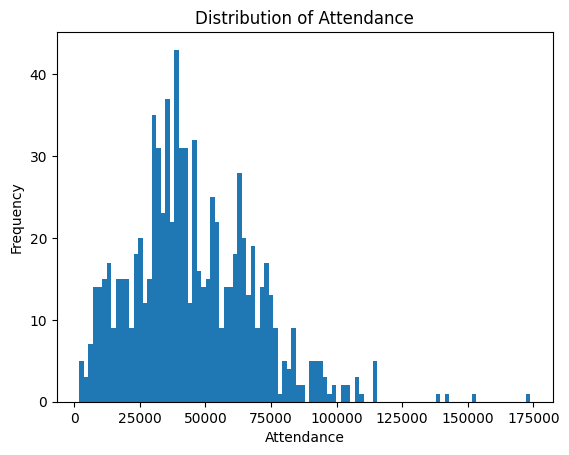

In [ ]:
plt.hist(df_matches['Attendance'], bins=100)
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.title('Distribution of Attendance')
plt.show()

## nuvem de palavras times com mais vitorias

In [ ]:
winner_by_score_home = df_matches['Home Team Goals'] > df_matches['Away Team Goals']
winner_by_score_away = df_matches['Home Team Goals'] < df_matches['Away Team Goals']
win_by_score = winner_by_score_home | winner_by_score_away
win_penalties = df_matches['Win conditions'].str.len() > 1

win_team_home = np.where(winner_by_score_home, df_matches['Home Team Name'], '')
win_team_away = np.where(winner_by_score_away, df_matches['Away Team Name'], '')

win_cond = df_matches['Win conditions'].str.split(pat='\(|\)|-', expand=True)
win_team_penalties = np.where(win_cond[0].str.len() > 1,
                     np.where(win_cond[1] > win_cond[2],
                              df_matches['Home Team Name'], df_matches['Away Team Name']), '')

win_team = np.where(win_team_home != '', win_team_home,
                    np.where(win_team_away != '', win_team_away, win_team_penalties))

df_matches.loc[:,'result'] = np.where(win_by_score, 'win', np.where(win_penalties, 'win', 'draw'))
df_matches.loc[:,'Winner'] = win_team
df_matches.loc[:,'Looser'] = np.where(df_matches['result'] != 'draw',
                                        np.where(win_team == df_matches['Home Team Name'],
                                                 df_matches['Away Team Name'],
                                                 df_matches['Home Team Name']), '')

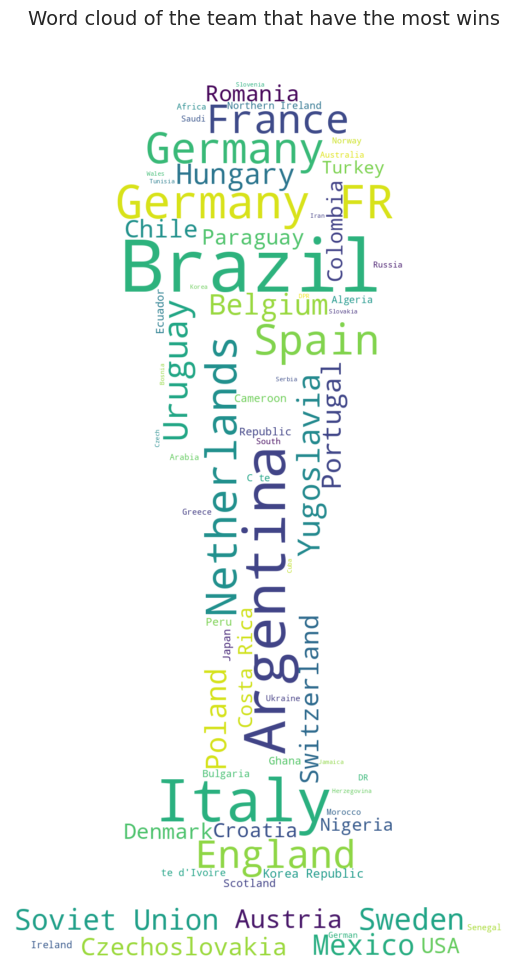

In [ ]:
# cup_mask = np.array(Image.open("./fifa-world-cup-thropy.jpg"))
cup_mask = np.array(Image.open('/content/drive/My Drive/world-cup-archives/fifa-world-cup-thropy.jpg'))

wc_cup = WordCloud(background_color="white", max_words=2000, mask=cup_mask)

winner_text = ' '.join(df_matches['Winner'].dropna().tolist())

wc_cup.generate(winner_text)

plt.figure(figsize = (21,12))
sns.set_style("whitegrid")

plt.title('Word cloud of the team that have the most wins', fontsize=14)
plt.imshow(wc_cup, interpolation='bilinear')
plt.axis("off")

plt.show()

## times com mais gols totais

In [ ]:
home = df_matches[['Home Team Name', 'Home Team Goals']].dropna()
away = df_matches[['Away Team Name', 'Away Team Goals']].dropna()

In [ ]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [ ]:
goals = pd.concat([home, away], ignore_index=True)

In [ ]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,12
Angola,1
Argentina,133
Australia,11
Austria,43
...,...
United Arab Emirates,2
Uruguay,80
Wales,4


In [ ]:
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Brazil,225
Argentina,133
Germany FR,131
Italy,128
France,108
...,...
Canada,0
Trinidad and Tobago,0
China PR,0


In [ ]:
# home_team_goals = df_matches.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()
# away_team_goals = df_matches.groupby('Away Team Name')['Away Team Goals'].sum().reset_index()
# home_team_goals.columns = ['Team', 'Goals']
# away_team_goals.columns = ['Team', 'Goals']
team_goals = pd.concat([home_team_goals, away_team_goals]).groupby('Team')['Goals'].sum().reset_index()
top_20_teams = team_goals.sort_values(by='Goals', ascending=False).head(20)

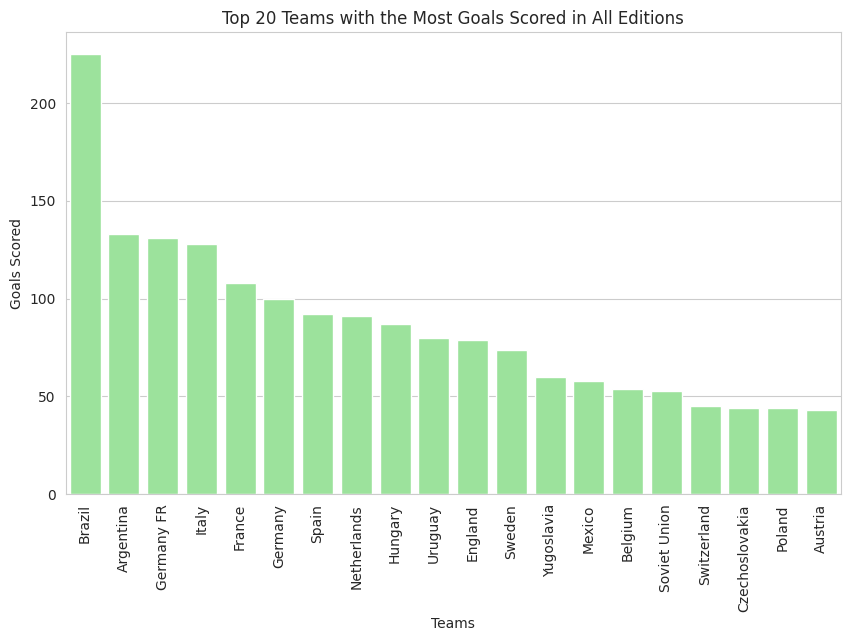

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Goals', data=top_20_teams, color='lightgreen')
plt.title('Top 20 Teams with the Most Goals Scored in All Editions')
plt.xlabel('Teams')
plt.ylabel('Goals Scored')
plt.xticks(rotation=90)
plt.show()


## mais gols por edicao

In [ ]:
home = df_matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year   Home Team Name
1,930  Argentina        16
       Brazil            4
       Chile             4
       France            4
       Paraguay          1
                        ..
2,014  Russia            1
       Spain             1
       Switzerland       4
       USA               2
       Uruguay           3
Name: Home Team Goals, Length: 366, dtype: float64

In [ ]:
away = df_matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year   Away Team Name
1,930  Argentina        2 
       Belgium          0 
       Bolivia          0 
       Brazil           1 
       Chile            1 
                        ..
2,014  Russia           1 
       Spain            3 
       Switzerland      3 
       USA              4 
       Uruguay          1 
Name: Away Team Goals, Length: 411, dtype: float64

In [ ]:
goals = pd.concat([home, away], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
Year                  
1,930 Argentina     18
      Brazil         5
      Chile          5
      France         4
      Paraguay       1
...                ...
1,998 Iran           2
      Mexico         8
      Norway         5
      Tunisia        1
2,006 IR Iran        0

[427 rows x 1 columns]

In [ ]:
goals = goals.reset_index()

In [ ]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals

,Year,Country,Goals
0,"1,930",Argentina,18
7,"1,930",Uruguay,15
6,"1,930",USA,7
8,"1,930",Yugoslavia,7
1,"1,930",Brazil,5
...,...,...,...
355,"2,014",Japan,2
361,"2,014",Russia,2
340,"2,014",Cameroon,1
352,"2,014",Honduras,1


In [ ]:
top5 = goals.groupby('Year').head()
top5.head(10)

,Year,Country,Goals
0,"1,930",Argentina,18
7,"1,930",Uruguay,15
6,"1,930",USA,7
8,"1,930",Yugoslavia,7
1,"1,930",Brazil,5
13,"1,934",Italy,12
11,"1,934",Germany,11
10,"1,934",Czechoslovakia,9
9,"1,934",Austria,7
12,"1,934",Hungary,5


In [ ]:
x, y = goals['Year'].values, goals['Goals'].values
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']

    data.append(go.Bar(x = year, y = goal, name = team))
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with most Goals', showlegend = True)

fig = go.Figure(data = data, layout = layout)
fig.show()

## partidas com maior numero de publico

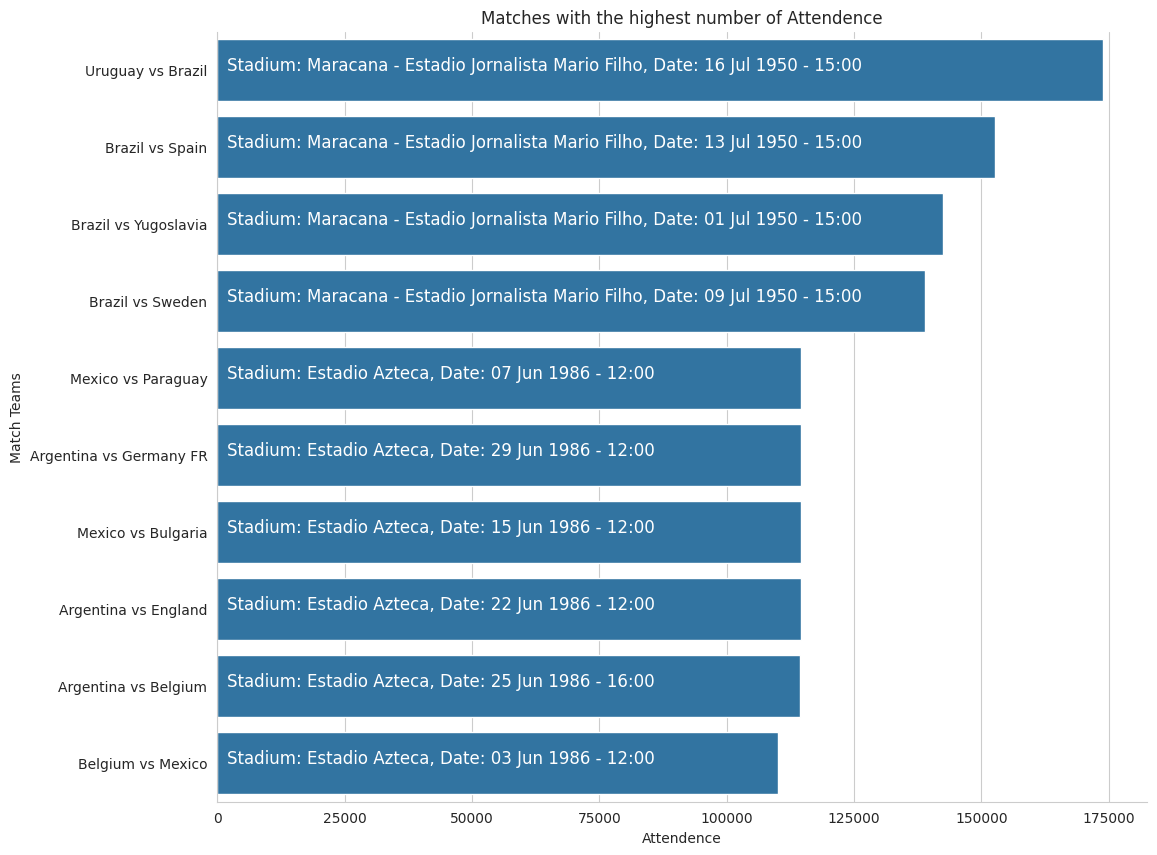

In [ ]:
top10 = df_matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

## estadios com maior media de publico

In [ ]:
df_matches['Year'] = df_matches['Year'].astype(int)
std = df_matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index()
std_sorted = std.sort_values(by='Attendance', ascending=False)
top_stadiums = std_sorted.head(10)

top_stadiums

,Stadium,City,Attendance
99,Maracana - Estadio Jornalista Mario Filho,Rio De Janeiro,"101,693"
32,Estadio Azteca,Mexico City,"100,924"
137,Rose Bowl,Los Angeles,"92,601"
179,Wembley Stadium,London,"86,448"
151,Soccer City Stadium,Johannesburg,"83,857"
146,Santiago Bernabeu,Madrid,"82,522"
167,Stanford Stadium,San Francisco,"81,737"
159,Stade de France,Saint-Denis,"78,222"
48,Estadio do Maracana,Rio De Janeiro,"74,197"
64,Giants Stadium,New York/New Jersey,"73,690"


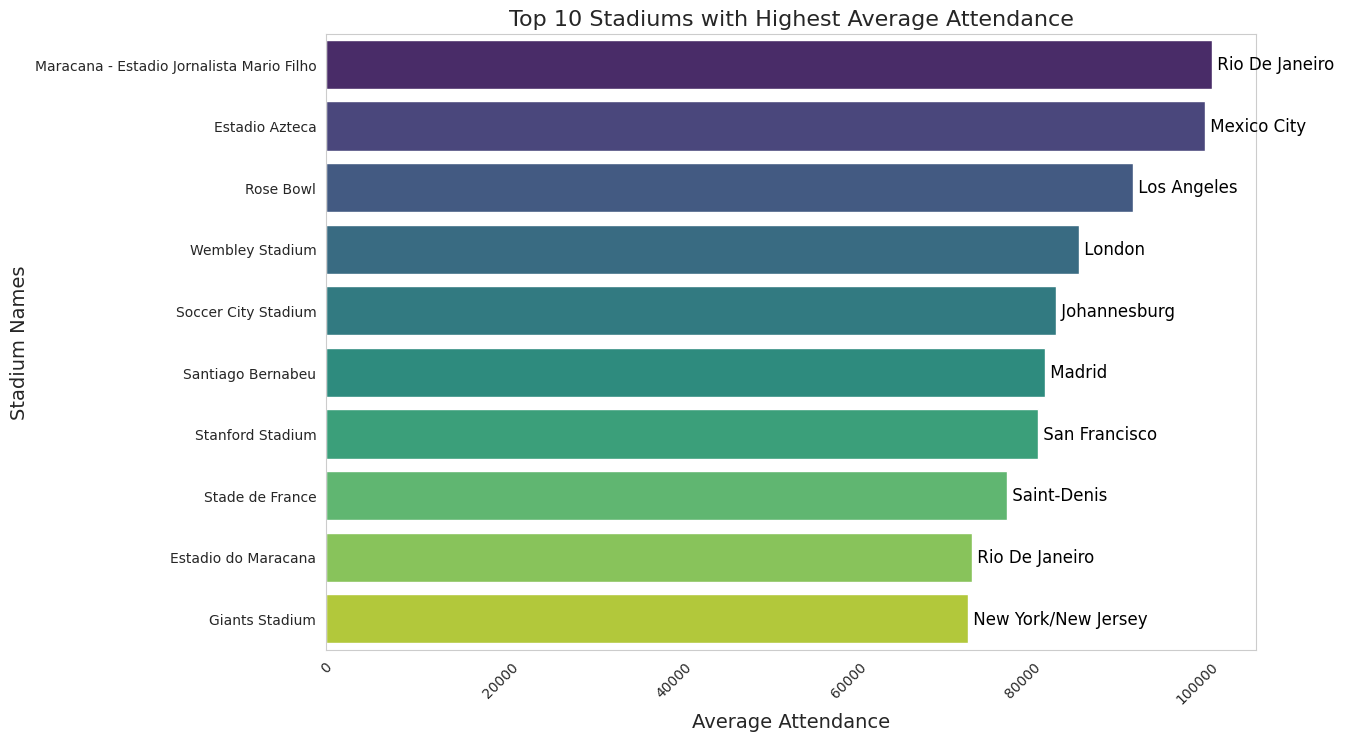

In [ ]:
df_matches['Year'] = df_matches['Year'].astype(int)
std = df_matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by='Attendance', ascending=False)
top_stadiums = std[:10]
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_stadiums['Stadium'], x=top_stadiums['Attendance'], hue=top_stadiums['Stadium'], palette='viridis', dodge=False, legend=False)

plt.title('Top 10 Stadiums with Highest Average Attendance', fontsize=16)
plt.xlabel('Average Attendance', fontsize=14)
plt.ylabel('Stadium Names', fontsize=14)
plt.xticks(rotation=45)

for i, (attendance, city) in enumerate(zip(top_stadiums['Attendance'], top_stadiums['City'])):
    ax.text(attendance, i, f' {city}', color='black', va='center', fontsize=12)

plt.grid(axis='x')

plt.show()

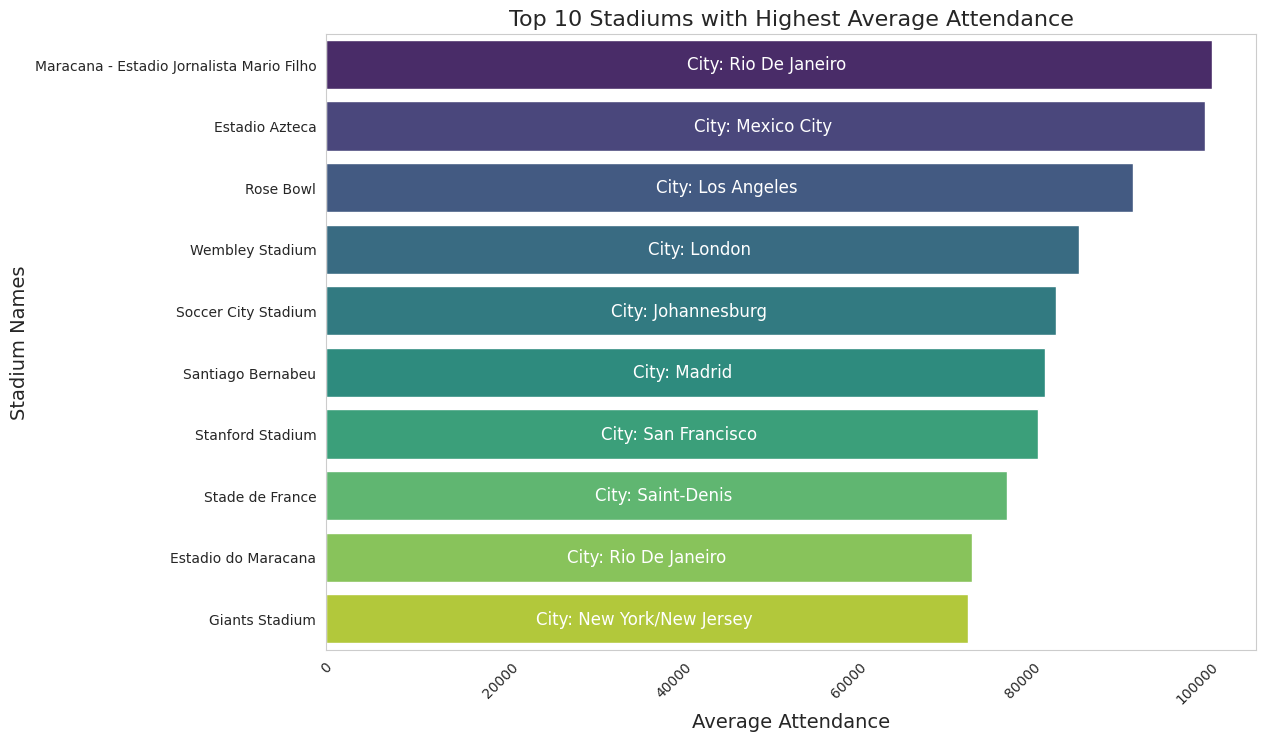

In [ ]:
df_matches['Year'] = df_matches['Year'].astype(int)
std = df_matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by='Attendance', ascending=False)
top_stadiums = std[:10]
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_stadiums['Stadium'], x=top_stadiums['Attendance'], hue=top_stadiums['Stadium'], dodge=False, palette='viridis', legend=False)

plt.title('Top 10 Stadiums with Highest Average Attendance', fontsize=16)
plt.xlabel('Average Attendance', fontsize=14)
plt.ylabel('Stadium Names', fontsize=14)
plt.xticks(rotation=45)

for i, (attendance, city) in enumerate(zip(top_stadiums['Attendance'], top_stadiums['City'])):
    ax.text(attendance * 0.5, i, f'City: {city}', color='white', ha='center', va='center', fontsize=12)  # Ajuste aqui

plt.grid(axis='x')

plt.show()